In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
%matplotlib inline

In [3]:
clicks_dtypes = {'advertiser': np.int8, 'action_id': np.float16, 'source_id': np.int8, 'country_code': 'category',
                 'latitude': np.float16, 'longitude': np.float16, 'carrier_id': np.float16, 'brand': np.float16,
                 'touchX': np.float16, 'touchY': np.float16}

clicks = pd.read_csv('clicks.csv', dtype = clicks_dtypes)

clicks.drop('action_id', axis = 1, inplace = True) #todos NaN
clicks.drop('wifi_connection', axis = 1, inplace = True) #todos False

clicks["created"] =  pd.to_datetime(clicks["created"], errors = "coerce") #parseo de fechas

## ¿Cuáles fueron los horarios y días de la semana en los cuales se registraron mayor cantidad de clicks?

In [4]:
clicks.head(2)

,advertiser_id,source_id,created,country_code,latitude,longitude,carrier_id,trans_id,os_minor,agent_device,os_major,specs_brand,brand,timeToClick,touchX,touchY,ref_type,ref_hash
0,2,4,2019-03-06 22:42:12.755,6333597102633388268,1.206055,1.070312,1.0,iGgClCM9exiHF4K31g94XmvHEBSLKIY,6.768137e+18,NaN,3.072849e+18,2733035977666442898,NaN,1.563,0.904785,0.078003,1891515180541284343,1904083516767779093
1,0,0,2019-03-08 10:24:30.641,6333597102633388268,1.218750,1.071289,4.0,MMHTOJ6qKAOeIH_Eywh1KIcCaxtO9oM,3.025219e+18,NaN,1.774085e+18,392184377613098015,NaN,NaN,NaN,NaN,1891515180541284343,3086509764961796666


In [7]:
clicks['hora'] = clicks['created'].dt.hour
clicks['dia_de_la_semana'] = clicks['created'].dt.dayofweek
clicks['cant_clicks'] = 1

In [8]:
clicks.head(1)

,advertiser_id,source_id,created,country_code,latitude,longitude,carrier_id,trans_id,os_minor,agent_device,...,specs_brand,brand,timeToClick,touchX,touchY,ref_type,ref_hash,hora,dia_de_la_semana,cant_clicks
0,2,4,2019-03-06 22:42:12.755,6333597102633388268,1.206055,1.070312,1.0,iGgClCM9exiHF4K31g94XmvHEBSLKIY,6.768137e+18,NaN,...,2733035977666442898,NaN,1.563,0.904785,0.078003,1891515180541284343,1904083516767779093,22,2,1


In [11]:
agrupamiento_clicks = clicks.groupby(['hora', 'dia_de_la_semana']).agg({'cant_clicks': 'count'})

In [13]:
agrupamiento_clicks.head(10)

cant_clicks
hora dia_de_la_semana             
0    2                         256
     4                         166
     5                          16
     6                           2
1    0                         878
     1                         411
     2                         222
     4                         988
     5                        1154
     6                         556

In [15]:
agrupamiento_clicks_desapilado = agrupamiento_clicks.unstack()['cant_clicks'] 
#completa con NaN si en un determinada hora y dia de la semana no hubo clicks

In [16]:
agrupamiento_clicks_desapilado.head(8)

dia_de_la_semana,0,1,2,3,4,5,6
hora,,,,,,,
0,NaN,NaN,256.0,NaN,166.0,16.0,2.0
1,878.0,411.0,222.0,NaN,988.0,1154.0,556.0
2,456.0,661.0,238.0,NaN,57.0,28.0,887.0
3,233.0,258.0,169.0,1.0,13.0,71.0,9.0
4,256.0,130.0,81.0,NaN,84.0,284.0,244.0
5,149.0,66.0,40.0,NaN,154.0,236.0,300.0
6,87.0,42.0,26.0,NaN,143.0,173.0,207.0
7,57.0,31.0,4.0,NaN,147.0,128.0,151.0


In [17]:
agrupamiento_clicks_desapilado = agrupamiento_clicks_desapilado.fillna(0)

In [72]:
agrupamiento_clicks_desapilado.columns = ['Lunes', 'Martes', 'Miercoles', 'Jueves','Viernes','Sabado', 'Domingo']

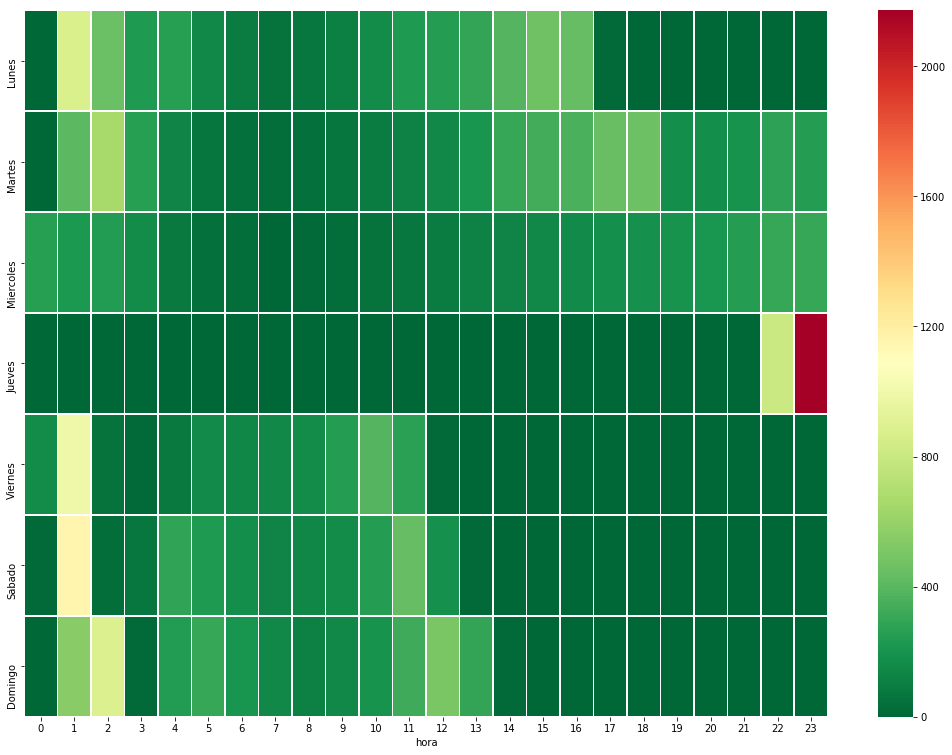

In [90]:
plt.figure(figsize=(18,13))
sns.heatmap(agrupamiento_clicks_desapilado.T, cmap='RdYlGn_r', linewidths=0.5)